<a href="https://colab.research.google.com/github/LilBeast999/S09_LAB_SVM_Gustavo_Torres/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

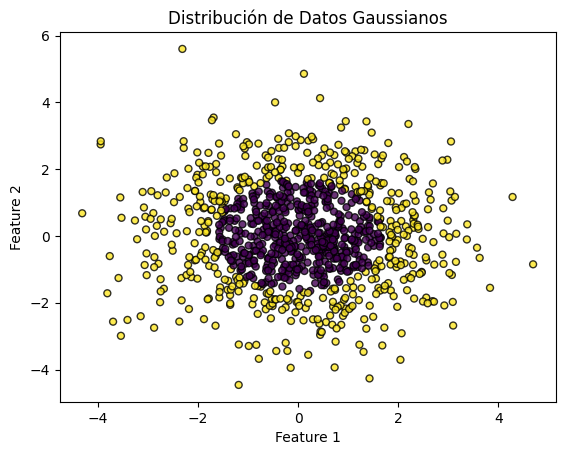

In [19]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

# Generar datos 2D distribuidos normalmente utilizando make_gaussian_quantiles
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)

# Graficar los datos: de azul a rojo, con transparencia.
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.title("Distribución de Datos Gaussianos")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# PASO 2: Manipulación de datos


In [3]:
#Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X1, Y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#PASO 3: Exploración de Datos

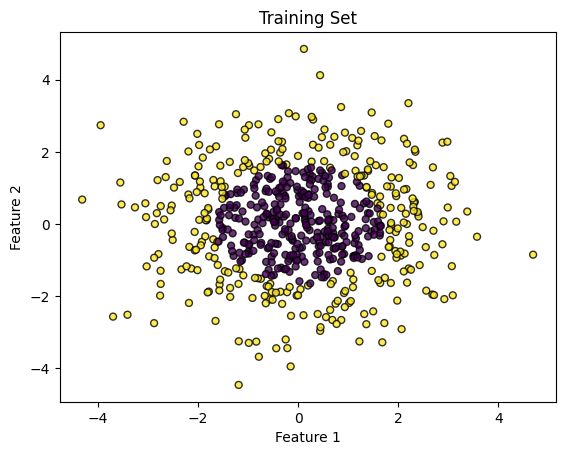

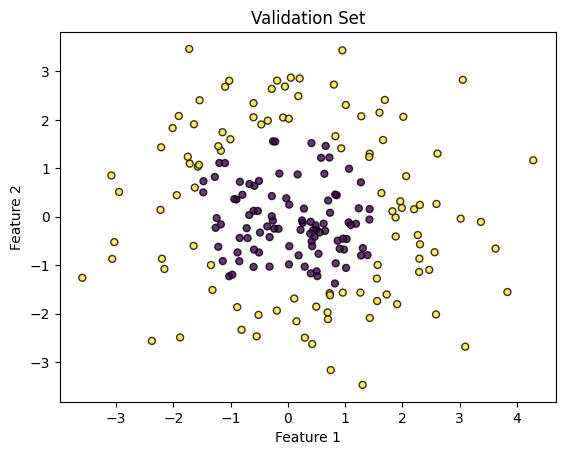

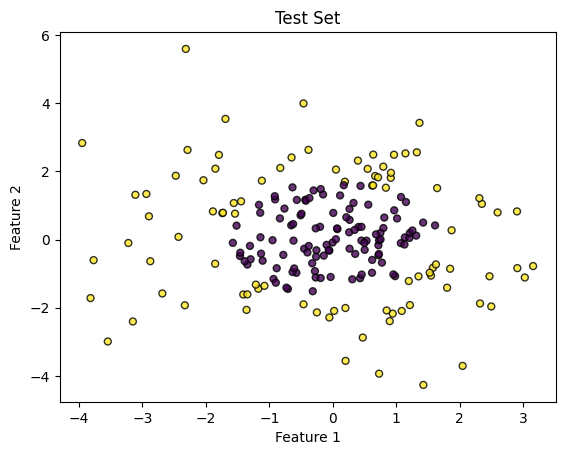

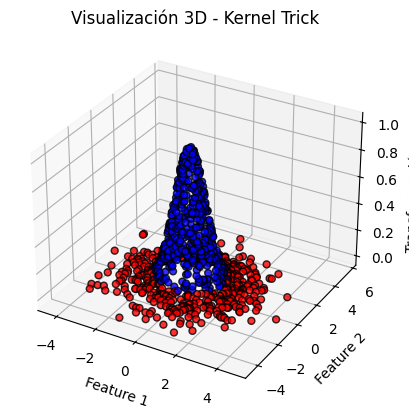

In [ ]:
#visualizacion de los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k', alpha=0.8)
plt.title("Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#visualizacion de los datos de validacion
plt.scatter(X_val[:, 0], X_val[:, 1], marker='o', c=y_val,
            s=25, edgecolor='k', alpha=0.8)
plt.title("Validation Set") 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#visualizacion del test set
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test,
            s=25, edgecolor='k', alpha=0.8)
plt.title("Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

from mpl_toolkits.mplot3d import Axes3D  # se carga para graficar en 3D
import matplotlib.pyplot as plt
import numpy as np


# Calculamos una nueva característica usando una función RBF simple.
Z = np.exp(- (X1[:, 0]**2 + X1[:, 1]**2))

# Crear la figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X1[:, 0], X1[:, 1], Z, c=Y1, cmap='bwr', s=25, edgecolor='k', alpha=0.8)

# Etiquetas y título
ax.set_title("Visualización 3D - Kernel Trick")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Transformación RBF")
plt.show()


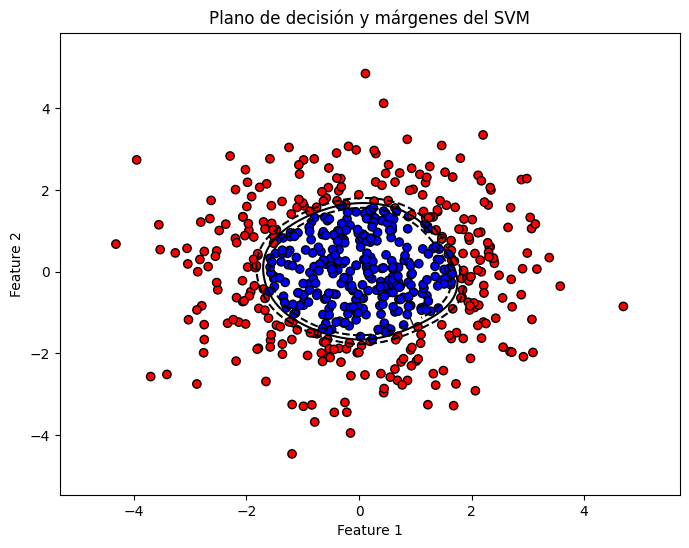

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Definir un rango para las features basado en el conjunto de entrenamiento
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Calcular la función de decisión para cada punto de la malla
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Dibujar las curvas de nivel: el límite de decisión (nivel 0) y los márgenes (niveles -1 y 1)
contours = plt.contour(xx, yy, Z, levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'], colors='k')
plt.clabel(contours, inline=True, fontsize=10)

# Graficar los puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Plano de decisión y márgenes del SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)

Validation Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



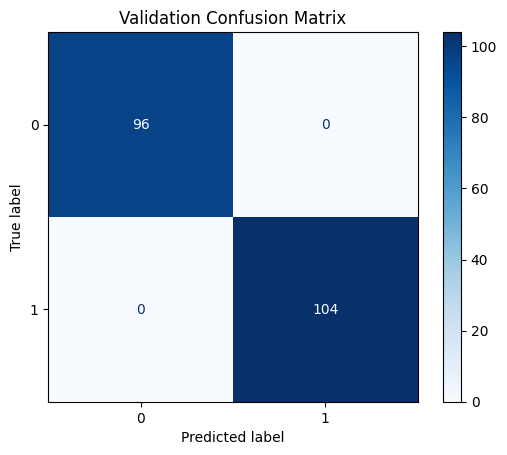

Test Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.97      0.99      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



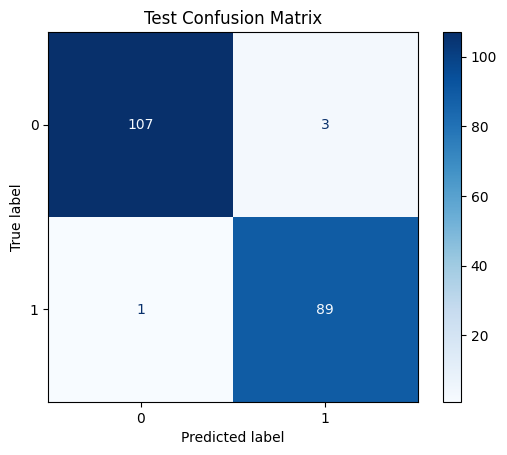

Estadísticas de Clasificación (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.97      0.99      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.97      0.99      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [17]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear pipeline con StandardScaler y SVC con kernel Gaussiano (RBF)
pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', probability=True))

# Definir la grilla de parámetros para GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

# Buscar los mejores parámetros usando validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Evaluación en el conjunto de validación
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("Validation Confusion Matrix")
plt.show()

# Evaluación en el conjunto de test
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("Test Confusion Matrix")
plt.show()


# Mostrar estadísticas de clasificación para el conjunto de test
print("Estadísticas de Clasificación (Test Set):")
print(classification_report(y_test, y_test_pred))

#PASO 5: Interpretación de los Resultados

El modelo muestra un comportamiento destacable durante la fase de validación, alcanzando una precisión, un recall y un F1-score de 1.0 para ambas clases. Esto significa que, con los datos que se utilizaron para ajustar los hiperparámetros, no hubo ningún error de clasificación: cada ejemplo fue asignado a su categoría correcta sin excepción. Un resultado así sugiere que el proceso de entrenamiento y la selección de parámetros fueron muy efectivos para capturar las características distintivas de cada clase en este conjunto

Al evaluar el modelo con datos nuevos en el conjunto de test, la precisión global descendió ligeramente hasta el 98 %. Esta pequeña variación se refleja en que la clase 0 presenta un recall un poco más bajo y la clase 1 una precisión levemente menor, lo que indica que existen casos marginales en los que el modelo puede dudar o confundir ejemplos cercanos al límite de decisión. Aunque la diferencia respecto a la validación (100 % → 98 %) podría sugerir un cierto grado de sobreajuste, la magnitud de este cambio es tan reducida que demuestra que el modelo conserva una capacidad de generalización muy alta.

Estos resultados apuntan a que el clasificador es fiable y robusto para tareas similares a las del conjunto sintético empleado. Si se quisiera aplicar a datos reales, convendría analizar si la pequeña pérdida de rendimiento —esa reducción del 2 %— es tolerable según los requisitos del caso de uso.